In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
dset = pd.read_csv("cardio_train.csv")

In [3]:
dset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data = dset.drop(['id'], axis=1)

In [5]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
data.isnull().sum(), pd.isnull(data).values.any(), pd.isnull(data).values.sum()

(age            0
 gender         0
 height         0
 weight         0
 ap_hi          0
 ap_lo          0
 cholesterol    0
 gluc           0
 smoke          0
 alco           0
 active         0
 cardio         0
 dtype: int64,
 False,
 0)

In [7]:
# target classes classes counts
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [8]:
#converting the age from Days to Years
data['age']=data['age']/365

In [9]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
# checking for duplicate values
data.duplicated().sum()

24

In [45]:
# removing duplicate values from DataFrame
data.drop_duplicates(inplace=True)

In [46]:
# checking the shape of the dataset after dropping duplicate values
data.shape

(69976, 12)

In [47]:
data['cardio'].value_counts()

0    35004
1    34972
Name: cardio, dtype: int64

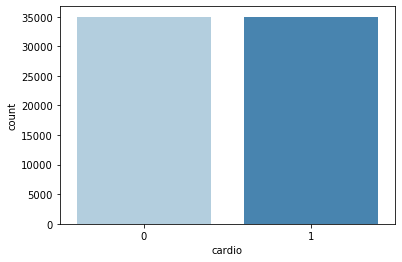

In [48]:
# target classes visualization
sns.countplot(data['cardio'], palette="Blues")

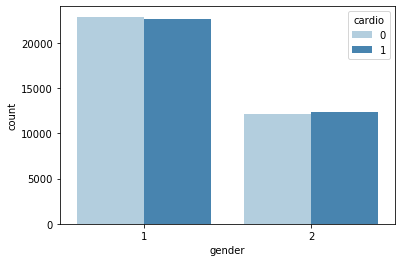

In [49]:
# visualizing samples by gender 1 = women, 2 = male
sns.countplot(x='gender', data=data, palette="Blues", hue="cardio")

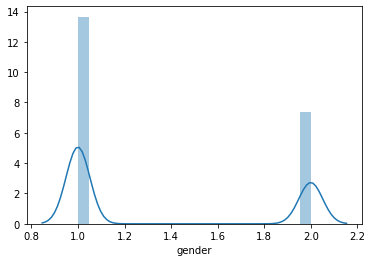

In [50]:
# distribution by gender
sns.distplot(data["gender"])

In [51]:
# feature correlation
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022763,-0.081546,0.053697,0.020765,0.017647,0.154432,0.098704,-0.047650,-0.029735,-0.009918,0.238189
gender,-0.022763,1.000000,0.499080,0.155320,0.005996,0.015241,-0.035915,-0.020558,0.338131,0.170950,0.005917,0.008037
height,-0.081546,0.499080,1.000000,0.290983,0.005488,0.006151,-0.050225,-0.018592,0.188003,0.094425,-0.006569,-0.010871
weight,0.053697,0.155320,0.290983,1.000000,0.030693,0.043695,0.141679,0.106790,0.067725,0.067071,-0.016863,0.181599
ap_hi,0.020765,0.005996,0.005488,0.030693,1.000000,0.016084,0.023768,0.011833,-0.000928,0.001403,-0.000031,0.054475
ap_lo,0.017647,0.015241,0.006151,0.043695,0.016084,1.000000,0.024004,0.010794,0.005177,0.010594,0.004784,0.065717
cholesterol,0.154432,-0.035915,-0.050225,0.141679,0.023768,0.024004,1.000000,0.451539,0.010298,0.035718,0.009927,0.221119
gluc,0.098704,-0.020558,-0.018592,0.106790,0.011833,0.010794,0.451539,1.000000,-0.004799,0.011214,-0.006761,0.089268
smoke,-0.047650,0.338131,0.188003,0.067725,-0.000928,0.005177,0.010298,-0.004799,1.000000,0.340077,0.025870,-0.015533
alco,-0.029735,0.170950,0.094425,0.067071,0.001403,0.010594,0.035718,0.011214,0.340077,1.000000,0.025486,-0.007366


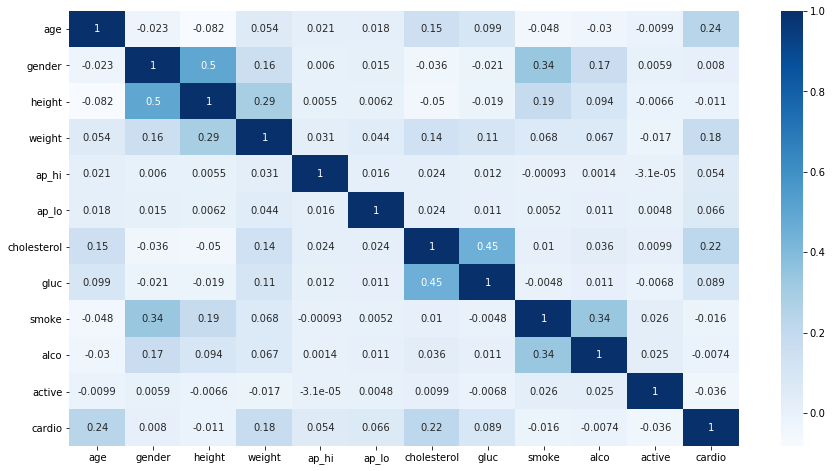

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="Blues")

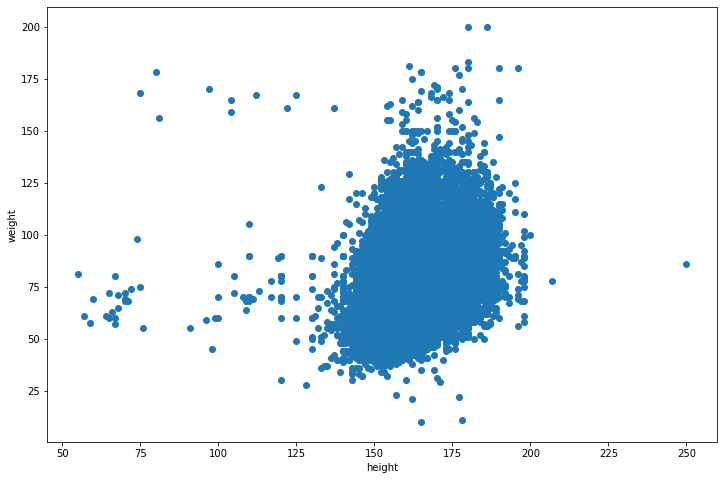

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['height'], data['weight'])
ax.set_xlabel('height')
ax.set_ylabel('weight')
plt.show()

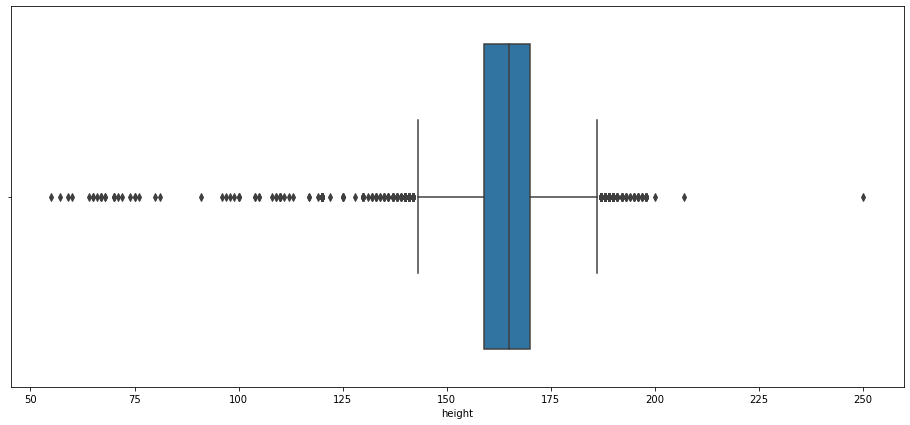

In [54]:
plt.figure(figsize=(16,7))
sns.boxplot(x=data["height"])

Text(0.5, 1.0, 'Visualization of outliers')

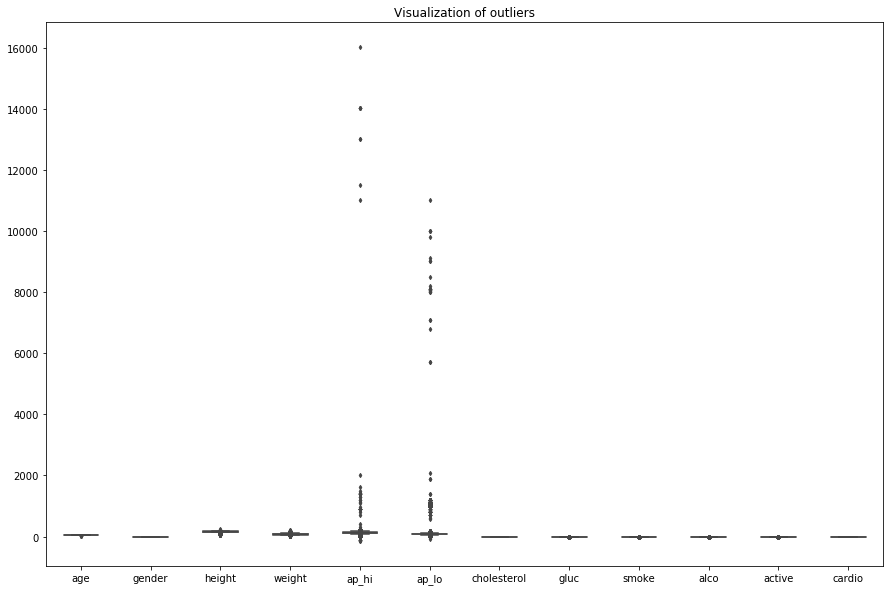

In [55]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)
plt.title("Visualization of outliers")

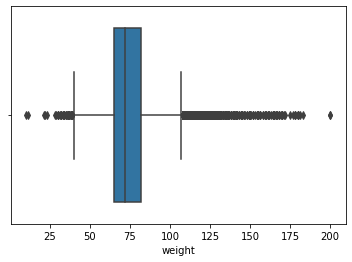

In [56]:
sns.boxplot(x=data["weight"])

In [57]:
# determining lower and upper quartiles
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

In [58]:
# IQR for each feature
IQR = Q3 - Q1
print(IQR)

age            10.035616
gender          1.000000
height         11.000000
weight         17.000000
ap_hi          20.000000
ap_lo          10.000000
cholesterol     1.000000
gluc            0.000000
smoke           0.000000
alco            0.000000
active          0.000000
cardio          1.000000
dtype: float64


In [59]:
# filgtering outliers
data2 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data2.shape

(38003, 12)

In [61]:
# setting parameters to separate outliers from non-outliers
# outliers = ((data['age'] <33.3) | (data['age'] >73.5) | (data["height"]<142.5) | (data["height"]>186.5)
#           | (data["weight"]<45) | (data['weight']>100) | (data["ap_hi"]<90) | (data["ap_hi"]>170) 
#           | (data["ap_lo"]<65) | (data["ap_lo"]>105))
# print("There are {} outliers".format(data[outliers]["cardio"].count()))

In [62]:
# dropping outliers
data = data[~outliers]

In [63]:
data.shape

(60974, 12)

Text(0.5, 1.0, 'Boxplot of features in cardiovascular disease data set after handling outliers')

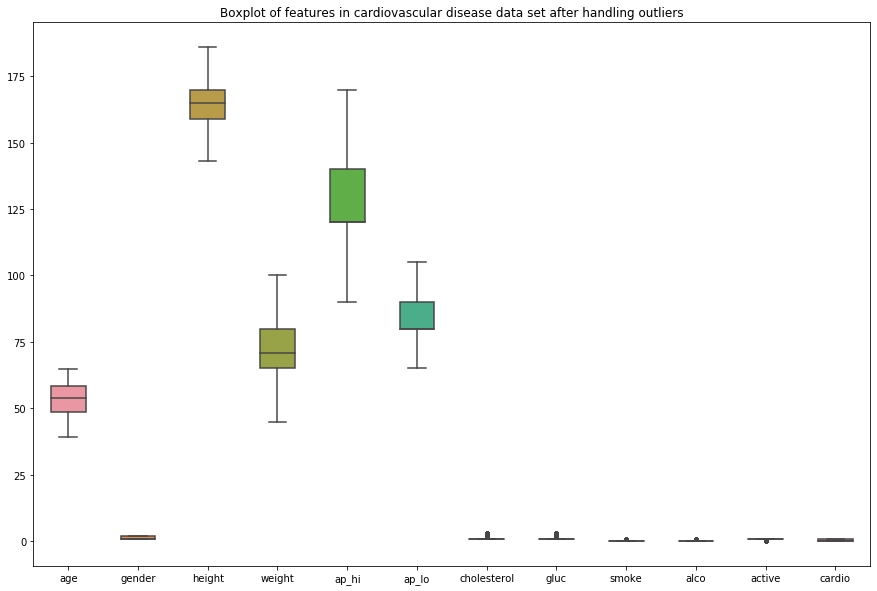

In [859]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)
plt.title("Boxplot of features in cardiovascular disease data set after handling outliers")

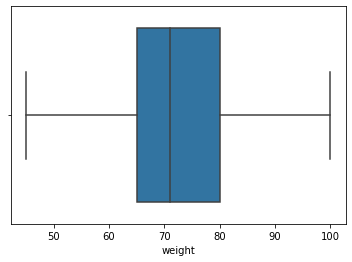

In [860]:
sns.boxplot(data['weight'])

In [861]:
data.shape

(60974, 12)

In [618]:
# First step of PCA for dimesionality reduction is standard normalization.
# (checking if features follow a gaussian distribution where mean=0, std=1),
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [619]:
# all values are converted to the same scale
scaled_data = scaler.transform(data)

In [620]:
# scaled data
scaled_data

array([[-0.44782902,  1.36677295,  0.47713197, ..., -0.2346671 ,
         0.49327329, -0.98803533],
       [ 0.29865143, -0.73165042, -1.11599098, ..., -0.2346671 ,
         0.49327329,  1.01210955],
       [-0.2590732 , -0.73165042,  0.07885123, ..., -0.2346671 ,
        -2.02727376,  1.01210955],
       ...,
       [-0.10326829,  1.36677295,  0.47713197, ..., -0.2346671 ,
         0.49327329, -0.98803533],
       [ 1.19483477, -0.73165042, -0.18666926, ..., -0.2346671 ,
        -2.02727376,  1.01210955],
       [ 0.42557345, -0.73165042,  0.74265246, ..., -0.2346671 ,
         0.49327329, -0.98803533]])

In [621]:
# shape of scaled data
scaled_data.shape

(62478, 12)

In [622]:
# PCA for dimensionality reduction

# n_components=2 means we convert number of features to 2
# If 0 < n_components < 1 and svd_solver == 'full', select the number of components 
# such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
# pca = PCA(n_components=6, svd_solver='full')
pca = PCA(n_components=9)

In [623]:
# fitting the PCA instance
pca.fit(scaled_data)

PCA(n_components=9)

In [624]:
# transforming scaled data so that we reduce number of features
x_pca = pca.transform(scaled_data)

In [625]:
# checking the shape for the scaled data and PCA respectively
scaled_data.shape, x_pca.shape

((62478, 12), (62478, 9))

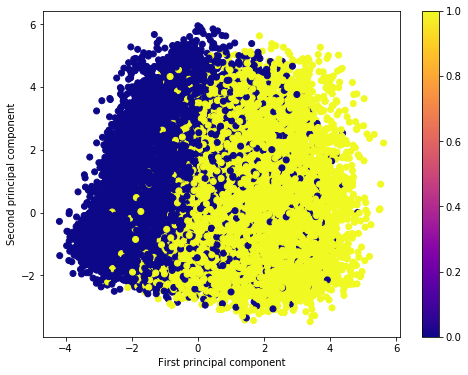

In [626]:
# plotting the first two dimensions
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=data["cardio"], cmap="plasma")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.colorbar()

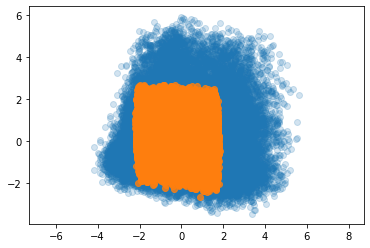

In [627]:
# new reduced dimensions vs initial data before dimension reduction
X_new = pca.inverse_transform(x_pca)
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 2], alpha=0.8)
plt.axis('equal');

In [628]:
# defining independent variables and target variable
X = x_pca
y = data["cardio"]

In [629]:
X

array([[-1.63522479,  0.95335457, -0.12338268, ..., -1.032281  ,
         0.36465023,  0.61648883],
       [ 2.30670802, -1.49896925,  0.37433708, ...,  0.60575482,
        -0.57821926, -0.56415339],
       [ 0.12597994, -1.12065834,  1.20438572, ..., -0.31263795,
        -1.63831962,  0.12799753],
       ...,
       [-0.63903845,  2.6909481 ,  0.23442922, ..., -0.77223595,
         0.45686291, -2.24548685],
       [ 0.93949116, -1.19022663,  0.22525772, ...,  0.06267787,
         0.06201676,  0.1108133 ],
       [-0.52051886, -0.25152449,  0.52484189, ...,  0.32507937,
         0.54558279,  0.0433238 ]])

In [630]:
y

0        0
1        1
2        1
3        1
5        0
        ..
69993    1
69994    1
69995    0
69998    1
69999    0
Name: cardio, Length: 62478, dtype: int64

In [631]:
# splitting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [632]:
# Support Vector Machine classifier
from sklearn.svm import SVC

In [633]:
# svm classifier 
svm_clf = SVC(kernel="linear")

In [634]:
# fitting the classifier
import time
start = time.time()

svm_clf.fit(X_train, y_train)

end = time.time()
print(end - start, "seconds")

0.5505349636077881 seconds


In [635]:
# model accuracy on training dataset
training_accuracy = svm_clf.score(X_train, y_train)
print("Training Accuracy: {0}%".format(training_accuracy*100))

Training Accuracy: 100.0%


In [636]:
# model accuracy on testing dataset
y_pred = svm_clf.predict(X_test)

In [637]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:{0}%".format(accuracy*100))

Accuracy:100.0%


In [638]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9435
           1       1.00      1.00      1.00      9309

    accuracy                           1.00     18744
   macro avg       1.00      1.00      1.00     18744
weighted avg       1.00      1.00      1.00     18744



In [639]:
print(confusion_matrix(y_test, y_pred))

[[9435    0]
 [   0 9309]]


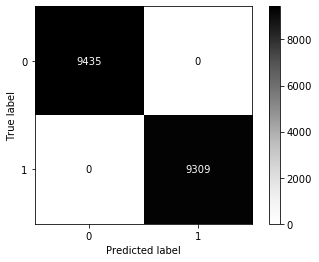

In [640]:
from sklearn.metrics import plot_confusion_matrix
# confusion matrix
plot_confusion_matrix(svm_clf, X_test, y_test, cmap="Greys")  # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [641]:
# finding the best number of components
for component in range(1,12):
    pca = PCA(n_components=component)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)
    X = x_pca
    y = data["cardio"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    svm_clf = SVC(kernel="linear").fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Dimensions:",component)
    print("Accuracy:",accuracy*100)
    print("*********************************")
        
#plotting 
# plt.figure(figsize=(8,8))
# plt.plot(component, accuracy)
# plt.show()

Dimensions: 1
Accuracy: 80.52176696542894
*********************************
Dimensions: 2
Accuracy: 81.90887750746906
*********************************
Dimensions: 3
Accuracy: 84.56039265898421
*********************************
Dimensions: 4
Accuracy: 84.64575330772513
*********************************
Dimensions: 5
Accuracy: 84.63508322663252
*********************************
Dimensions: 6
Accuracy: 84.816474605207
*********************************
Dimensions: 7
Accuracy: 84.97652582159625
*********************************
Dimensions: 8
Accuracy: 100.0
*********************************
Dimensions: 9
Accuracy: 100.0
*********************************
Dimensions: 10
Accuracy: 100.0
*********************************
Dimensions: 11
Accuracy: 100.0
*********************************


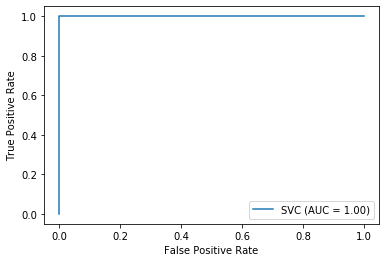

In [416]:
# ROC curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(svm_clf,X_test,y_test)

In [417]:
# Before PCA

In [418]:
x_before_pca = data.drop(['cardio'], axis=1)
y_before_pca = data['cardio']

In [419]:
X_train_no_pca, X_test_no_pca, y_train_no_pca, y_test_no_pca = train_test_split(x_before_pca, y_before_pca, test_size=0.3, random_state=100)

In [420]:
# svm classifier before PCA
svm_clf.fit(X_train_no_pca, y_train_no_pca)

SVC(kernel='linear')

In [56]:
y_pred_no_pca = svm_clf.predict(X_test_no_pca)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test_no_pca, y_pred_no_pca))
print("***************************************************")
print(classification_report(y_test_no_pca, y_pred_no_pca))

Accuracy: 0.7244381749197393
***************************************************
              precision    recall  f1-score   support

           0       0.69      0.81      0.75     10352
           1       0.77      0.64      0.70     10206

    accuracy                           0.72     20558
   macro avg       0.73      0.72      0.72     20558
weighted avg       0.73      0.72      0.72     20558



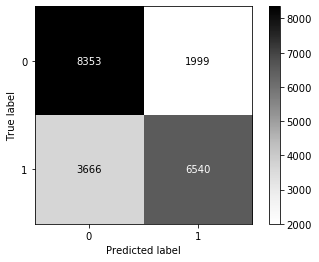

In [58]:
print(plot_confusion_matrix(svm_clf, X_test_no_pca, y_test_no_pca, cmap="Greys"))

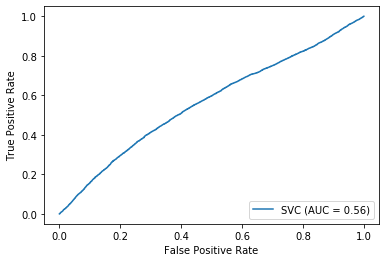

In [59]:
# ROC curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(svm_clf,X_test,y_test)